In [1]:
%load_ext autoreload
%autoreload 1
%matplotlib inline


In [2]:
import numpy as np
import pandas as pd
import matplotlib, collections, itertools, os, re, textwrap, logging
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from functools import reduce

from logging.config import dictConfig
from logging import getLogger

dictConfig(dict(
    version = 1,
    formatters = {'f': {'format': '%(asctime)s %(name)-12s %(levelname)-8s %(message)s'}},
    handlers = {
        'h': {'class': 'logging.StreamHandler','formatter': 'f',
              'level': logging.DEBUG}},
    root = {'handlers': ['h'], 'level': logging.DEBUG,},
))

matplotlib.rc('font',**{'size':16, 'family':'sans-serif','sans-serif':['HelveticaNeue', 'Helvetica']})

logger = getLogger('notebook')


In [3]:
import yt_misc_py as yt_misc

import rivas_decomposition_py as decomposition


In [5]:
import plotly

plotly.offline.init_notebook_mode(connected=True)

In [6]:
repo_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath(os.getcwd()))))

out_dir = os.path.join(
    repo_dir, 'figs', os.path.basename(os.path.realpath(os.getcwd())),
)


In [7]:
# d_PTVs = decomposition.decomposition(os.path.join(
#     repo_dir, 'private_data', 'npz', 'dev_PTVsNonMHC_z_center_p0001_100PCs_20180129.npz'
# ))

# d_coding = decomposition.decomposition(os.path.join(
#     repo_dir, 'private_data', 'npz', 'dev_codingNonMHC_z_center_p0001_100PCs_20180129.npz'
# ))

d_all = decomposition.decomposition(os.path.join(
    repo_dir, 'private_data', 'npz', 'dev_allNonMHC_z_center_p0001_100PCs_20180129.npz'
))


2018-05-19 12:58:57,652 data_load_from_npz INFO     reading data from /Users/yosuke/repos/rivas-lab/decomposition/private_data/npz/dev_allNonMHC_z_center_p0001_100PCs_20180129.npz


In [16]:
font = {
#     'family' : 'normal',
#     'weight' : 'bold',
    'size'   : 32
}
matplotlib.rc('font', **font)


In [20]:
biplot_phes = [
    'heart attack/myocardial infarction',
    'high cholesterol',
    'Statin',
    'Simvastatin',
    'Pulse rate, automated reading',
    'Systolic blood pressure, automated reading',
    'Diastolic blood pressure, automated reading'    
]


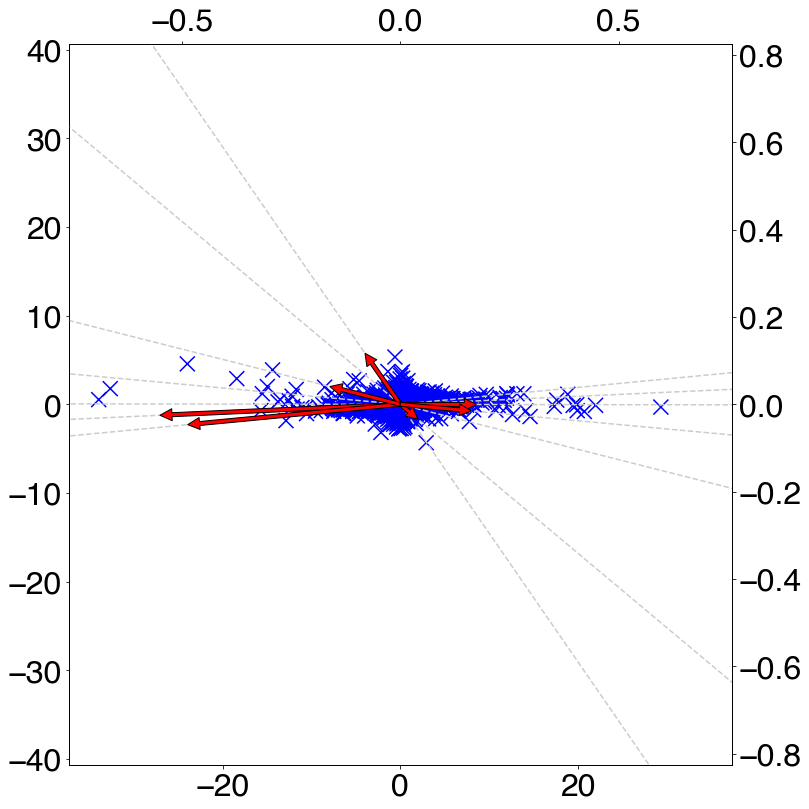

In [22]:
biplot_df = decomposition.plot_biplot(
    d_all, 
    pc_index1=22 - 1, pc_index2=100 - 1, 
    biplot_phes=biplot_phes, 
    arrow_max_scale=1.5,    
    figsize=(12,12), 
    save=os.path.join(out_dir, 'Biplot_MI_PC22xPC100')
)

In [23]:
biplot_df['slope'] = biplot_df['y'] / biplot_df['x']

In [24]:
biplot_df.sort_values(by='slope')

,phe,x,y,slope
0,heart attack/myocardial infarction,-0.080740,0.117014,-1.449262
3,Simvastatin,0.040566,-0.033987,-0.837826
4,"Pulse rate, automated reading",-0.161184,0.040809,-0.253185
6,"Diastolic blood pressure, automated reading",0.162751,-0.015025,-0.092318
5,"Systolic blood pressure, automated reading",0.174217,-0.000263,-0.001511
1,high cholesterol,-0.550460,-0.024981,0.045382
2,Statin,-0.486961,-0.046522,0.095536


### plotly for annotation

In [10]:
variant_df = pd.read_csv(
    os.path.join(repo_dir, 'private_data', 'variant_and_gene_labels.tsv.gz'), 
    sep='\t', compression='gzip',
)
var2gene_dict = dict(zip(variant_df['label_var'], variant_df['label_gene']))


In [8]:
plotly.offline.iplot(decomposition.plotly_eigen_phe(d_all, 22 - 1 , 100 - 1))

In [26]:
import mygene

In [27]:
mg = mygene.MyGeneInfo()

In [11]:
plotly.offline.iplot(decomposition.plotly_factor_var(d_all, 22 - 1, 100 - 1, var2gene_dict))

In [31]:
mg.querymany(
    [
        'ENSG00000267282', 'ENSG00000130202',
        'ENSG00000241388', 'ENSG00000135100',
    ], 
    scopes='ensembl.gene',
    fields='symbol', 
    species='human', 
    as_dataframe=True,
    df_index=False,
)

querying 1-4...done.
Finished.


,_id,_score,query,symbol
0,ENSG00000267282,18.624405,ENSG00000267282,AC011481.2
1,5819,18.630508,ENSG00000130202,NECTIN2
2,283460,18.644503,ENSG00000241388,HNF1A-AS1
3,6927,17.830470,ENSG00000135100,HNF1A


In [30]:
mg.querymany(
    [
        'ENSG00000267282', 'ENSG00000130202', 
        'ENSG00000267467', 'ENSG00000224916',
    ], 
    scopes='ensembl.gene',
    fields='symbol', 
    species='human', 
    as_dataframe=True,
    df_index=False,
)

querying 1-4...done.
Finished.


,_id,_score,query,symbol
0,ENSG00000267282,18.623964,ENSG00000267282,AC011481.2
1,5819,18.630846,ENSG00000130202,NECTIN2
2,346,17.820345,ENSG00000267467,APOC4
3,ENSG00000224916,18.630327,ENSG00000224916,APOC4-APOC2
